## When was used MSE measurement and when cross_entropy(log loss)?

While corss entropy measures the classifications performances whose outputs are probability between 0 and 1, MSE(mean square error) measures the regression preformace.

## When is softmax activation function used?

Softmax activation function is used for multiclass classification predicting class membership probabilities of output layer which classes are mutually exclusive.

## What is difference betwenn incremental learning and batch learning?

While in incremental learning the learning algorithm and its weights are updated by one training data, in batch learning they are update by average of multiple training data feedback, providing faster speed on algorithm.Each learning method is apropriate for various problems.For example, batch learning is applied for systems only have new data every week, but in case of every minute data changing, incremental learning is more suitable.In addtion incremental learning will be efficient if machine learning's memory not enough for huge data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers.experimental import preprocessing
import tensorflow as tf
from tensorflow.keras.utils import timeseries_dataset_from_array
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense


tmps_df = pd.read_excel('/content/drive/MyDrive/Temperature.xlsx')
dataset = np.array(tmps_df['دما'])
print("total number = {}".format(len(dataset)))

total number = 29095


In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(dataset.reshape(-1,1)))

print(scaler.data_max_)

normed_dataset = scaler.transform(dataset.reshape(-1,1))

MinMaxScaler(copy=True, feature_range=(0, 1))
[41.7]


Data before normalization

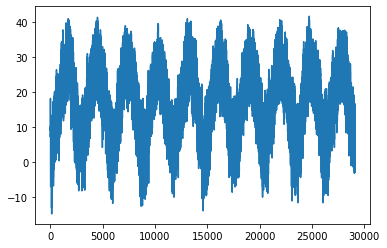

In [3]:

plt.plot(dataset)

Data after normalization

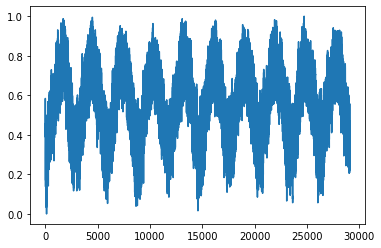

In [4]:
plt.plot(normed_dataset)

In [5]:

def prepare_timeseries(dataset, window_size, sequence_stride, sampling_rate=1):
  time_series = timeseries_dataset_from_array(
      dataset[:-sequence_stride], dataset[window_size:], window_size, sequence_stride=1, sampling_rate=1, batch_size=len(dataset), shuffle=True
  )
  return time_series.get_single_element()

window_sizes = [3, 5, 10]

time_series = prepare_timeseries(normed_dataset.flatten(), window_size=window_sizes[0], sequence_stride=1, sampling_rate=1)
x1, y1 = time_series
x1train, x1test = tf.split(x1, [ int(0.7*len(x1)), len(x1) - int(0.7*len(x1))] )
y1train, y1test = tf.split(y1, [ int(0.7*len(y1)), len(y1) - int(0.7*len(y1))] )

print("with winodw size={} train data{}={}".format(3, 1,x1train.shape))
print("with winodw size={} test data{}={}\n\n".format(3, 1,x1test.shape))

time_series = prepare_timeseries(normed_dataset.flatten(), window_size=window_sizes[1], sequence_stride=1, sampling_rate=1)
x2, y2 = time_series
x2train, x2test = tf.split(x2, [  int(0.7*len(x2)), len(x2) - int(0.7*len(x2))] )
y2train, y2test = tf.split(y2, [  int(0.7*len(y2)), len(y2) - int(0.7*len(y2))] )
print("with winodw size={} train data{}={}".format(3, 2,x2train.shape))
print("with winodw size={} test data{}={}\n\n".format(3, 2,x2test.shape))

time_series = prepare_timeseries(normed_dataset.flatten(), window_size=window_sizes[2], sequence_stride=1, sampling_rate=1)
x3, y3 = time_series
x3train, x3test = tf.split(x3, [  int(0.7*len(x3)), len(x3) - int(0.7*len(x3)) ] )
y3train, y3test = tf.split(y3, [ int(0.7*len(y3)), len(y3) - int(0.7*len(y3))] )
print("with winodw size={} train data{}={}".format(3, 3,x3train.shape))
print("with winodw size={} test data{}={}\n\n".format(3, 3, x3test.shape))



with winodw size=3 train data1=(20364, 3)
with winodw size=3 test data1=(8728, 3)


with winodw size=3 train data2=(20363, 5)
with winodw size=3 test data2=(8727, 5)


with winodw size=3 train data3=(20359, 10)
with winodw size=3 test data3=(8726, 10)




Window size = 3

In [6]:

model1 = Sequential()
model1.add(Dense(8, activation='relu'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model1.add(Dense(1,))

model1.compile(loss='mean_squared_error',optimizer=optimizer)
model1.build(input_shape=(1,window_sizes[0]))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (1, 8)                    32        
_________________________________________________________________
dense_1 (Dense)              (1, 1)                    9         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model1.fit(x1train, y1train, validation_split=0.3, epochs=20, shuffle=True, verbose=1)

Epoch 1/20
446/446 [==============================] - 1s 2ms/step - loss: 0.0055 - val_loss: 0.0049
Epoch 2/20
446/446 [==============================] - 1s 1ms/step - loss: 0.0051 - val_loss: 0.0048
Epoch 3/20
446/446 [==============================] - 1s 1ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 4/20
446/446 [==============================] - 1s 1ms/step - loss: 0.0051 - val_loss: 0.0053
Epoch 5/20
446/446 [==============================] - 1s 1ms/step - loss: 0.0050 - val_loss: 0.0048
Epoch 6/20
446/446 [==============================] - 1s 1ms/step - loss: 0.0051 - val_loss: 0.0048
Epoch 7/20
446/446 [==============================] - 1s 1ms/step - loss: 0.0051 - val_loss: 0.0055
Epoch 8/20
446/446 [==============================] - 1s 1ms/step - loss: 0.0050 - val_loss: 0.0050
Epoch 9/20
446/446 [==============================] - 1s 1ms/step - loss: 0.0051 - val_loss: 0.0052
Epoch 10/20
446/446 [==============================] - 1s 1ms/step - loss: 0.0051 - val_loss: 0.0048

In [8]:
model1.evaluate(x1test,y1test)

273/273 [==============================] - 0s 822us/step - loss: 0.0049


0.004911096766591072

[[0.8095127 ]
 [0.5210223 ]
 [0.3808269 ]
 ...
 [0.8348931 ]
 [0.45418948]
 [0.65856254]]


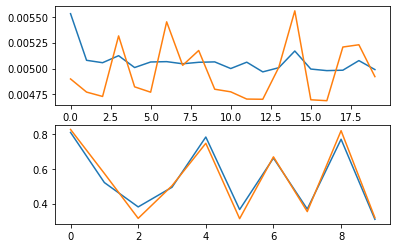

In [9]:
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.subplot(2, 1, 2)
predicts = model1.predict(x1test)
plt.plot(predicts[:10])
plt.plot(y1test[:10])
print(predicts)

Window_size 5
In this part i wlil ilustrate how plaining the netwrok structure results in bad result although the window size increased

In [10]:
model2 = Sequential()
# model2.add(Dense(8, activation='relu'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model2.add(Dense(1,))

model2.compile(loss='mean_squared_error',optimizer=optimizer)
model2.build(input_shape=(1,window_sizes[1]))
model2.summary()
history = model2.fit(x2train, y2train, validation_split=0.3, epochs=20, shuffle=True, verbose=1)
model2.evaluate(x2test,y2test)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (1, 1)                    6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
446/446 [==============================] - 1s 2ms/step - loss: 0.0143 - val_loss: 0.0051
Epoch 2/20
446/446 [==============================] - 1s 1ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 3/20
446/446 [==============================] - 1s 1ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 4/20
446/446 [==============================] - 1s 1ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 5/20
446/446 [==============================] - 1s 1ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 6/20
446/446 [==============================] - 1s 1ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 7/20
446/446 [==============================] - 

0.0035974052734673023

Predicts

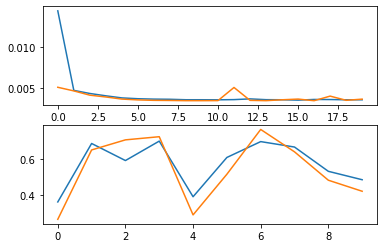

In [11]:
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.subplot(2, 1, 2)
predicts = model2.predict(x2test)
plt.plot(predicts[:10])
plt.plot(y2test[:10])

Window size 10

In [12]:
model3 = Sequential()
# model3.add(Dense(8, activation='relu'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model3.add(Dense(1,))

model3.compile(loss='mean_squared_error',optimizer=optimizer)
model3.build(input_shape=(1,window_sizes[2]))
model3.summary()
history = model3.fit(x3train, y3train, validation_split=0.3, epochs=20, shuffle=True, verbose=1)
model3.evaluate(x3test,y3test)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (1, 1)                    11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
446/446 [==============================] - 1s 1ms/step - loss: 0.0406 - val_loss: 0.0075
Epoch 2/20
446/446 [==============================] - 1s 1ms/step - loss: 0.0060 - val_loss: 0.0051
Epoch 3/20
446/446 [==============================] - 1s 1ms/step - loss: 0.0043 - val_loss: 0.0036
Epoch 4/20
446/446 [==============================] - 1s 1ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 5/20
446/446 [==============================] - 1s 1ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 6/20
446/446 [==============================] - 1s 1ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 7/20
446/446 [==============================] 

0.0012332107871770859

The line graph provided shows that as window become bigger model can learn more.

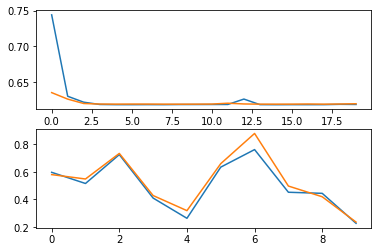

In [55]:
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.subplot(2, 1, 2)
predicts = model3.predict(x3test)
plt.plot(predicts[:10])
plt.plot(y3test[:10])

This is an example of real scale of data which its graph is totally simmilar to normed scale, so for future works i will not retransform my results to real scale.

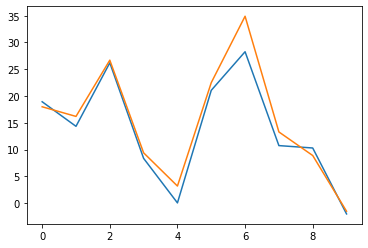

In [56]:
import numpy as np
plt.plot(scaler.inverse_transform(predicts)[:10])
plt.plot(scaler.inverse_transform(np.array(y3test).reshape(-1,1)[:10]))


lets change the activation function for window size 5

In [14]:
model4 = Sequential()
model4.add(Dense(2, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model4.add(Dense(1,))

model4.compile(loss='mean_squared_error',optimizer=optimizer)
model4.build(input_shape=(1,window_sizes[0]))
model4.summary()
history = model4.fit(x1train, y1train, validation_split=0.3, epochs=20, shuffle=True, verbose=1)
model4.evaluate(x1test,y1test)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (1, 2)                    8         
_________________________________________________________________
dense_5 (Dense)              (1, 1)                    3         
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
446/446 [==============================] - 1s 2ms/step - loss: 0.0316 - val_loss: 0.0110
Epoch 2/20
446/446 [==============================] - 1s 1ms/step - loss: 0.0089 - val_loss: 0.0076
Epoch 3/20
446/446 [==============================] - 1s 1ms/step - loss: 0.0074 - val_loss: 0.0069
Epoch 4/20
446/446 [==============================] - 1s 1ms/step - loss: 0.0067 - val_loss: 0.0061
Epoch 5/20
446/446 [==============================] - 1s 1ms/step - loss: 0.0061 - val_loss: 0.0056
Epoch 6/20
446/446 [

0.00478762574493885

The line gaph ilustrates with sigmoid function model did not work as well as relu function model which is a linear function.As a result the linear regression does not work effectively with non-linear functions.

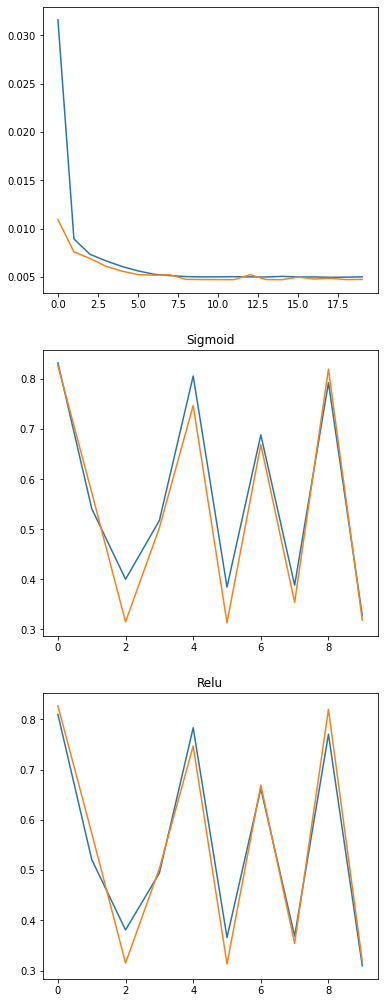

In [15]:
plt.subplot(3, 1, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.subplot(3, 1, 2)
predicts = model4.predict(x1test)
plt.title('Sigmoid')
plt.plot(predicts[:10])
plt.plot(y1test[:10])

plt.subplot(3, 1, 3)
predicts = model1.predict(x1test)
plt.title('Relu')
plt.plot(predicts[:10])
plt.plot(y1test[:10])

plt.subplots_adjust( top=3.5)


lets change the learning rate

In [16]:
model5 = Sequential()
model5.add(Dense(2, activation='relu'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
model5.add(Dense(1,))

model5.compile(loss='mean_squared_error',optimizer=optimizer)
model5.build(input_shape=(1,window_sizes[0]))
model5.summary()
history = model5.fit(x1train, y1train, validation_split=0.3, epochs=20, shuffle=True, verbose=1)
model5.evaluate(x1test,y1test)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (1, 2)                    8         
_________________________________________________________________
dense_7 (Dense)              (1, 1)                    3         
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
446/446 [==============================] - 1s 2ms/step - loss: 0.0391 - val_loss: 0.0354
Epoch 2/20
446/446 [==============================] - 1s 1ms/step - loss: 0.0371 - val_loss: 0.0377
Epoch 3/20
446/446 [==============================] - 1s 1ms/step - loss: 0.0370 - val_loss: 0.0380
Epoch 4/20
446/446 [==============================] - 1s 1ms/step - loss: 0.0367 - val_loss: 0.0365
Epoch 5/20
446/446 [==============================] - 1s 1ms/step - loss: 0.0368 - val_loss: 0.0356
Epoch 6/20
446/446 [

0.03603053465485573

it is evident that with bigger learning rate model works worse.

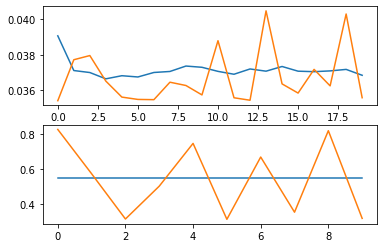

In [17]:
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.subplot(2, 1, 2)
predicts = model5.predict(x1test)
plt.plot(predicts[:10])
plt.plot(y1test[:10])

lets change the loss function

In [18]:
model6 = Sequential()
model6.add(Dense(2, activation='relu'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model6.add(Dense(1,))

model6.compile(loss='binary_crossentropy',optimizer=optimizer)
model6.build(input_shape=(1,window_sizes[0]))
model6.summary()
history = model6.fit(x1train, y1train, validation_split=0.3, epochs=20, shuffle=True, verbose=1)
model6.evaluate(x1test,y1test)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (1, 2)                    8         
_________________________________________________________________
dense_9 (Dense)              (1, 1)                    3         
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
446/446 [==============================] - 1s 2ms/step - loss: 0.7441 - val_loss: 0.6354
Epoch 2/20
446/446 [==============================] - 1s 1ms/step - loss: 0.6303 - val_loss: 0.6263
Epoch 3/20
446/446 [==============================] - 1s 1ms/step - loss: 0.6220 - val_loss: 0.6201
Epoch 4/20
446/446 [==============================] - 1s 1ms/step - loss: 0.6188 - val_loss: 0.6194
Epoch 5/20
446/446 [==============================] - 1s 1ms/step - loss: 0.6185 - val_loss: 0.6193
Epoch 6/20
446/446 [

0.6190806031227112

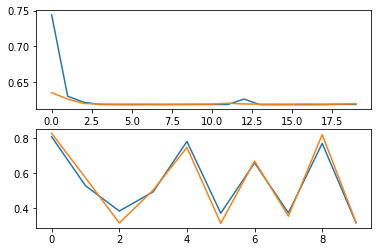

In [19]:
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.subplot(2, 1, 2)
predicts = model6.predict(x1test)
plt.plot(predicts[:10])
plt.plot(y1test[:10])

# conclusion
1.linear activation functions are more apropriate for linear regression problems

2.As learning rate are become excessively big optimization algorithm could not find the best solution.

3.probablity loss functions are not suitable for regression problems.

4.As layers in model increase overfitting occured.

5.The most important point if window size increase, training model can learn better.